In [25]:
import pandas as pd
iris_data = pd.read_csv('iris.data', names=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'class'])

In [26]:
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
iris_data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [28]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

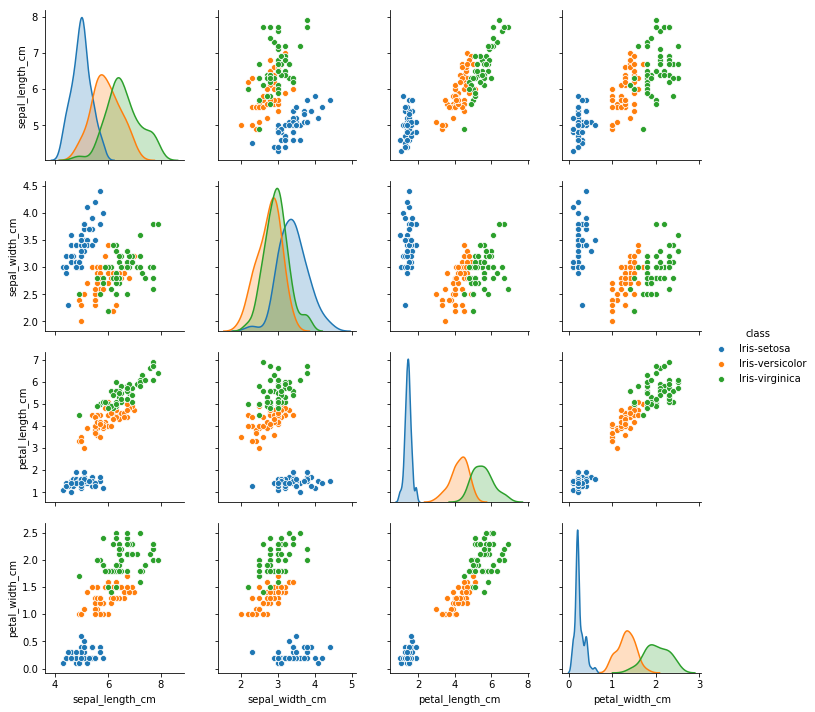

In [30]:
sns.pairplot(iris_data, hue='class')

In [31]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'class'] = 'Iris-setosa'
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

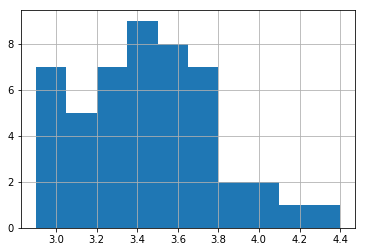

In [16]:
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

In [32]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & 
              (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [35]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


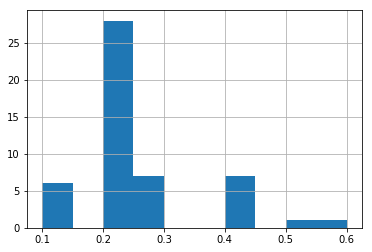

In [36]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()

In [37]:
iris_data.to_csv('iris-data-clean.csv', index=False)
iris_data_clean = pd.read_csv('iris-data-clean.csv')

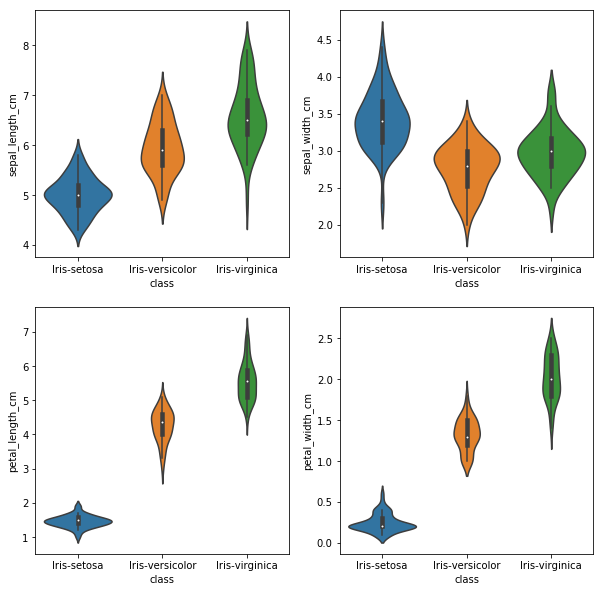

In [38]:
plt.figure(figsize=(10,10))
for column_index, column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.violinplot(x='class', y=column, data=iris_data_clean)

In [46]:
from sklearn.model_selection import train_test_split
feature_value = iris_data_clean[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']].values
target_value = iris_data_clean['class'].values
x_train, x_test, y_train, y_test = train_test_split(feature_value, target_value, test_size=0.3, random_state=1)

from sklearn.tree import DecisionTreeClassifier
dts = DecisionTreeClassifier()
dts.fit(x_train, y_train)
dts.score(x_test, y_test)

0.9555555555555556

(array([   0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
           0.]),
 array([0.47368421, 0.57368421, 0.67368421, 0.77368421, 0.87368421,
        0.97368421, 1.07368421, 1.17368421, 1.27368421, 1.37368421,
        1.47368421]),
 <a list of 10 Patch objects>)

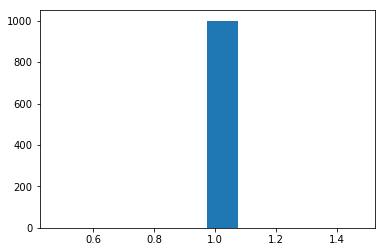

In [50]:
model_accuracies = []

for repetition in range(1000):
    (x_train,
     x_test,
     y_train,
     y_test) = train_test_split(feature_value, target_value, test_size=0.25, random_state=1)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(x_train, y_train)
    classifier_accuracy = decision_tree_classifier.score(x_test, y_test)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)

In [55]:
from sklearn.model_selection import StartifiedKFold
import numpy as np
def plot_cv(cv, features, labels):
    maskes = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    plt.figure(figsize=(15,15))
    plt.imshow(masks, interpolation='none', cmap='grey_r')
    plt.ylabel('Fold')
    plt.xlabel('Row')
plot_cv(StartifiedKFold(n_splits=10), all_inputs, all_labels)

ImportError: cannot import name 'StartifiedKFold' from 'sklearn.model_selection' (/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/__init__.py)

Text(0.5, 1.0, 'Average score : 0.9533333333333334')

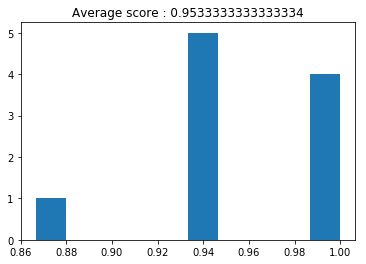

In [57]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(decision_tree_classifier, feature_value, target_value, cv=10)
plt.hist(cv_scores)
plt.title('Average score : {}'.format(np.mean(cv_scores)))

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
decision_tree_classifier = DecisionTreeClassifier()
parameter_grid = {'max_depth': [1, 2, 3, 4, 5], 'max_features': [1, 2, 3, 4]}
cross_validation = StratifiedKFold(n_splits=10)
grid_search = GridSearchCV(decision_tree_classifier, param_grid=parameter_grid, cv=cross_validation)
grid_search.fit(feature_value, target_value)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameter: {}'.format(grid_search.best_params_))

Best score: 0.96
Best parameter: {'max_depth': 3, 'max_features': 3}


Text(33.0, 0.5, 'max_depth')

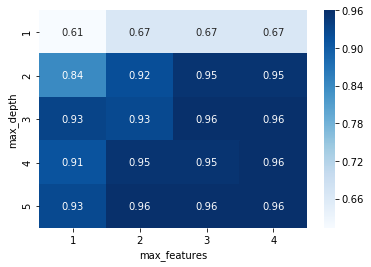

In [63]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5,4)
sns.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [66]:
decision_tree_classifier = DecisionTreeClassifier()
param_grid = {'criterian': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [1, 2, 3, 4]}
cross_validation = StratifiedKFold(n_splits=10)
grid_search = GridSearchCV(decision_tree_classifier, param_grid=parameter_grid, cv=cross_validation)
grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9732142857142857
Best parameters: {'max_depth': 3, 'max_features': 2}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
